In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math 

In [2]:
df = pd.read_csv('drug200.csv')
pd.set_option('max_columns',100)
df.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,drugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,drugY
9,43,M,LOW,NORMAL,19.368,drugY


In [5]:
target = df['Drug'].unique()
feature1_sex = df['Sex'].unique()
feature2_bp = df['BP'].unique()
feature3_Chol = df['Cholesterol'].unique()

In [6]:
target

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [7]:
df.describe(include='all')

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,drugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


In [8]:
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [9]:
df1=df.isnull()
for column in df1.columns:
    print('null values: ',len(df1)-df1[column].value_counts()[0],' , non null values: ',df1[column].value_counts()[0],' , column:',column)

null values:  0  , non null values:  200  , column: Age
null values:  0  , non null values:  200  , column: Sex
null values:  0  , non null values:  200  , column: BP
null values:  0  , non null values:  200  , column: Cholesterol
null values:  0  , non null values:  200  , column: Na_to_K
null values:  0  , non null values:  200  , column: Drug


In [10]:
l1=len(df)
df.drop_duplicates(subset=df.columns,inplace=True)
l2=len(df)
print('no of duplicates found : ',l1-l2)

no of duplicates found :  0


In [11]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

# applying min max scaler 
scaler = MinMaxScaler()
df.iloc[:,4] = scaler.fit_transform(df.iloc[:,4].values.reshape(-1,1))

#applying label encoding
le = LabelEncoder()
df.iloc[:,1] = le.fit_transform(df.iloc[:,1])
df.iloc[:,2] = le.fit_transform(df.iloc[:,2])
df.iloc[:,3] = le.fit_transform(df.iloc[:,3])
df.iloc[:,-1] = le.fit_transform(df.iloc[:,-1])


x = df.iloc[:,0:5].values
y = df.iloc[:,-1].values


In [12]:
df.corr()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
Age,1.000000,0.102027,0.054212,-0.068234,-0.063119,-0.004828
Sex,0.102027,1.000000,-0.007814,-0.008811,-0.125008,-0.098573
BP,0.054212,-0.007814,1.000000,-0.137552,-0.149312,0.372868
Cholesterol,-0.068234,-0.008811,-0.137552,1.000000,0.010000,0.055629
Na_to_K,-0.063119,-0.125008,-0.149312,0.010000,1.000000,0.589120
Drug,-0.004828,-0.098573,0.372868,0.055629,0.589120,1.000000


## Visualisation

### Drug ===> [0,1,2,3,4] ===> ['drugA', 'drugB', 'drugC','drugX','drugY']

<AxesSubplot:xlabel='Drug', ylabel='count'>

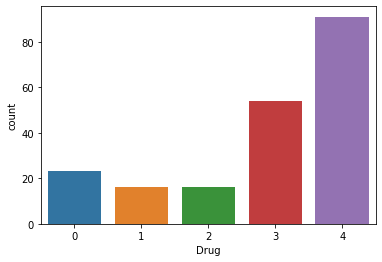

In [13]:
sns.countplot(x='Drug',data=df)

### [0,1] ===> [female,male] ===> [green,red]

<AxesSubplot:xlabel='Drug', ylabel='Na_to_K'>

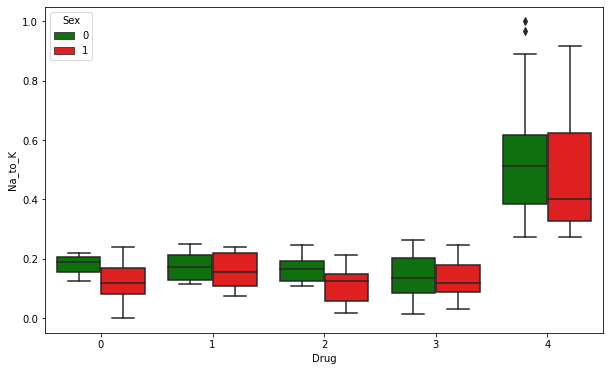

In [14]:
plt.figure(figsize=(10,6))
col=['green','red']
sns.boxplot(y='Na_to_K', x='Drug',hue='Sex',data=df,palette=col)

### Drug ===> [0,1,2,3,4] ===> ['drugA', 'drugB', 'drugC','drugX','drugY'
### BP ===> [0,1,2] ===> [high,low,medium]

<AxesSubplot:xlabel='BP', ylabel='Age'>

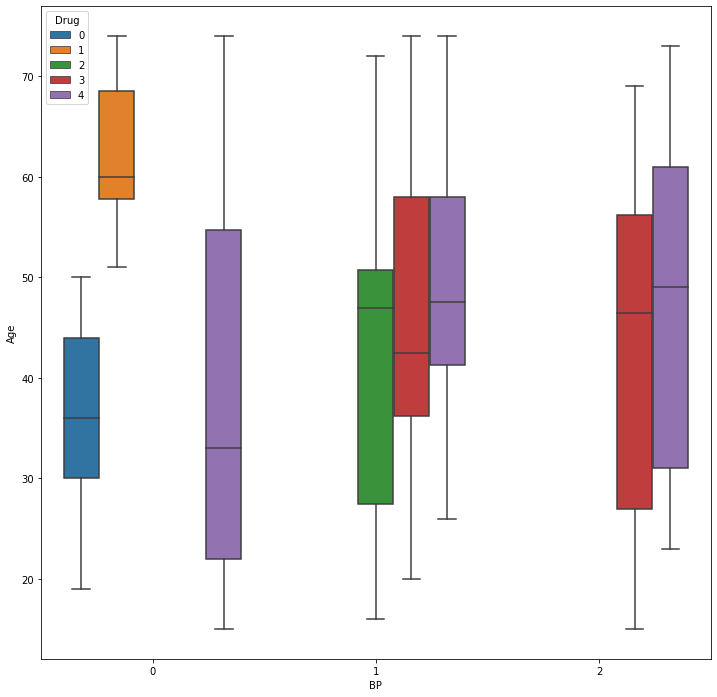

In [15]:
plt.figure(figsize=(12,12))
sns.boxplot(y='Age', x='BP',hue='Drug',data=df)

### Drug ===> [0,1,2,3,4] ===> ['drugA', 'drugB', 'drugC','drugX','drugY']
### cholesterol ===> [0,1] ===> [high,low]

<AxesSubplot:xlabel='Cholesterol', ylabel='Age'>

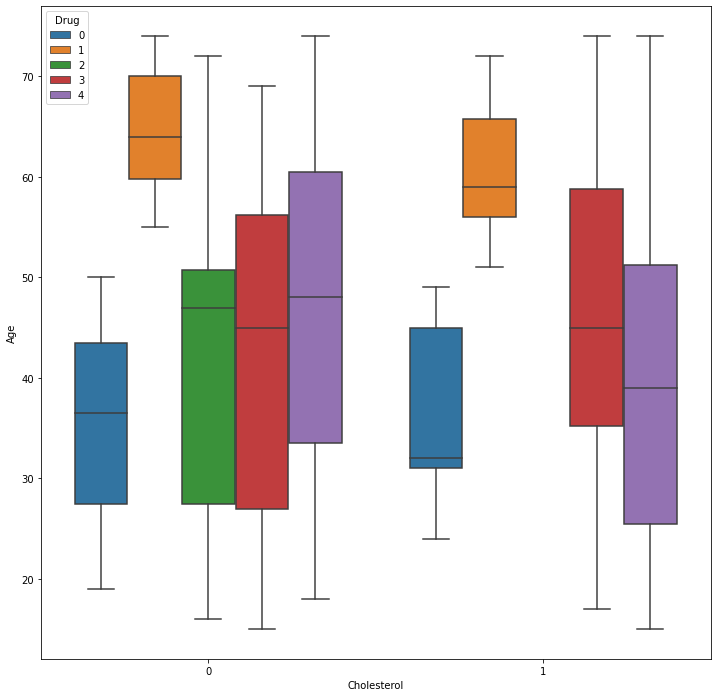

In [16]:
plt.figure(figsize=(12,12))
sns.boxplot(y='Age', x='Cholesterol',hue='Drug',data=df)

In [21]:
df.columns[0:5]

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'], dtype='object')

## Implimenting Decision tree model

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=17)

In [23]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy', random_state=10)
model.fit(x_train,y_train)

tabel1 = pd.DataFrame({'actual':y_test,'predicted':model.predict(x_test)})
tabel1.replace(to_replace=[0,1,2,3,4],value=['drugA', 'drugB', 'drugC','drugX','drugY'],inplace=True)

In [24]:
tabel1.head(10)

,actual,predicted
0,drugY,drugY
1,drugX,drugX
2,drugC,drugC
3,drugA,drugA
4,drugX,drugX
5,drugC,drugC
6,drugY,drugY
7,drugB,drugB
8,drugB,drugB
9,drugY,drugY


In [25]:
from sklearn.metrics import classification_report

In [26]:
print(classification_report(tabel1['actual'],tabel1['predicted']))

              precision    recall  f1-score   support

       drugA       0.75      1.00      0.86         3
       drugB       1.00      0.83      0.91         6
       drugC       1.00      1.00      1.00         2
       drugX       1.00      0.93      0.97        15
       drugY       0.93      1.00      0.97        14

    accuracy                           0.95        40
   macro avg       0.94      0.95      0.94        40
weighted avg       0.96      0.95      0.95        40



## Visualisation of decision tree

[Text(871.875, 978.48, 'Na_to_K <= 0.262\nentropy = 1.937\nsamples = 160\nvalue = [20, 10, 14, 39, 77]\nclass = drugB'),
 Text(697.5, 761.0400000000001, 'BP <= 0.5\nentropy = 1.808\nsamples = 83\nvalue = [20, 10, 14, 39, 0]\nclass = drugA'),
 Text(348.75, 543.6, 'Age <= 51.5\nentropy = 0.918\nsamples = 30\nvalue = [20, 10, 0, 0, 0]\nclass = drugY'),
 Text(174.375, 326.1600000000001, 'entropy = 0.0\nsamples = 20\nvalue = [20, 0, 0, 0, 0]\nclass = drugY'),
 Text(523.125, 326.1600000000001, 'entropy = 0.0\nsamples = 10\nvalue = [0, 10, 0, 0, 0]\nclass = drugC'),
 Text(1046.25, 543.6, 'BP <= 1.5\nentropy = 0.833\nsamples = 53\nvalue = [0, 0, 14, 39, 0]\nclass = drugA'),
 Text(871.875, 326.1600000000001, 'Cholesterol <= 0.5\nentropy = 0.98\nsamples = 24\nvalue = [0, 0, 14, 10, 0]\nclass = drugX'),
 Text(697.5, 108.72000000000003, 'entropy = 0.0\nsamples = 14\nvalue = [0, 0, 14, 0, 0]\nclass = drugX'),
 Text(1046.25, 108.72000000000003, 'entropy = 0.0\nsamples = 10\nvalue = [0, 0, 0, 10, 0]\

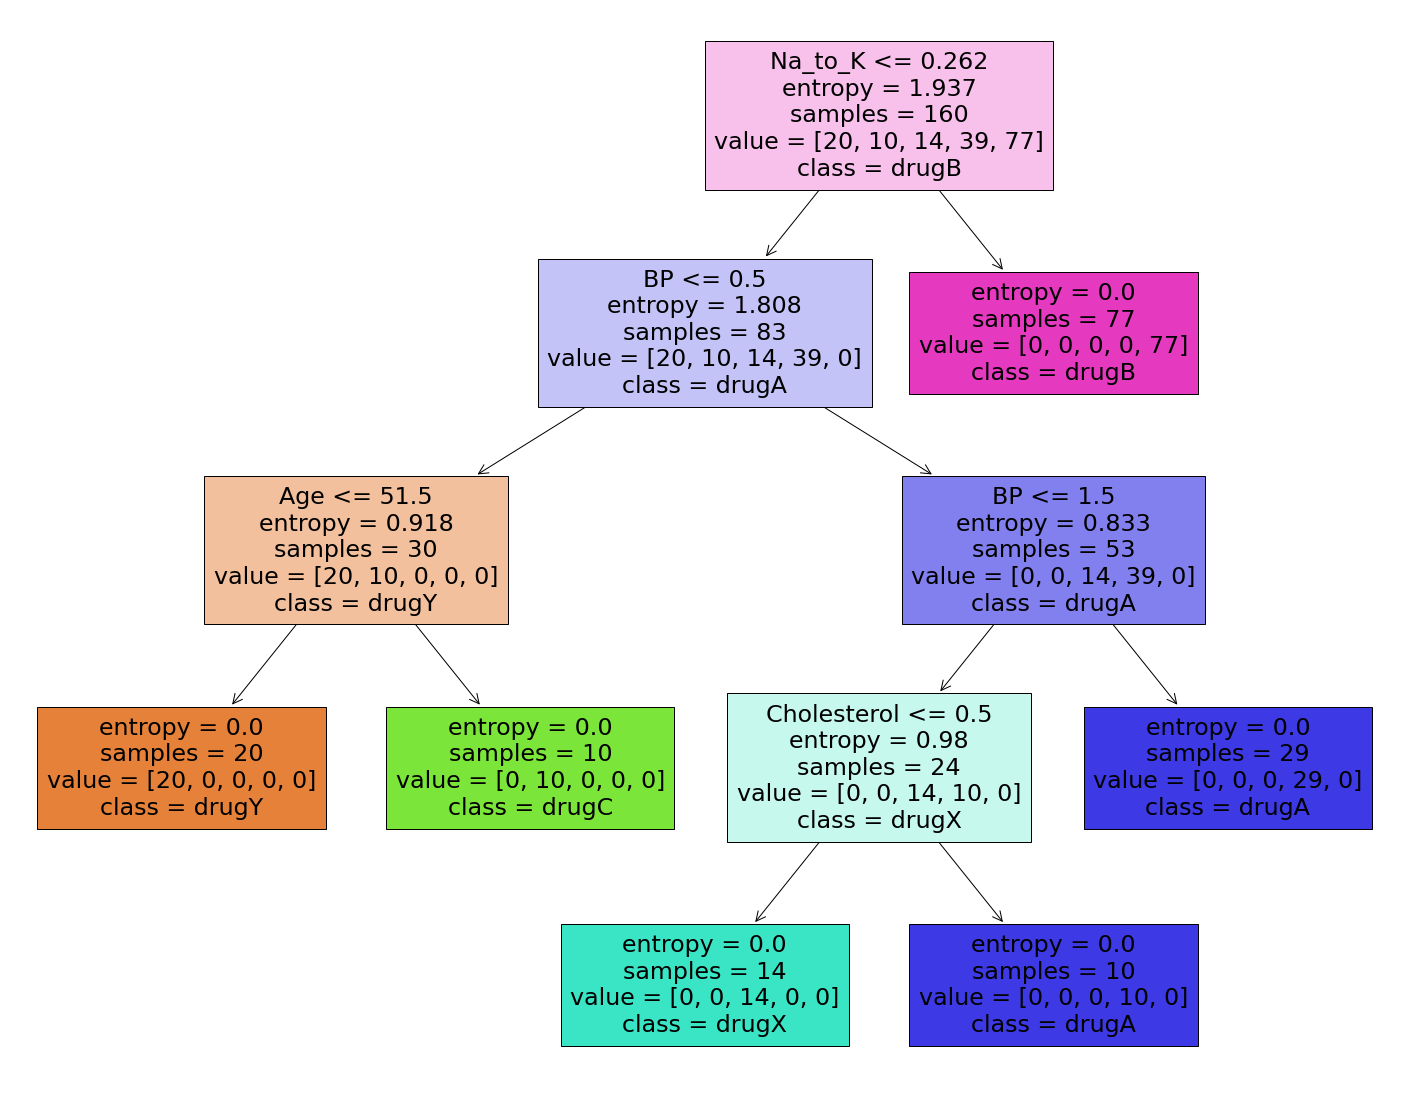

In [27]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
tree.plot_tree(model, 
                   feature_names=df.columns[0:5],  
                   class_names=target,
                   filled=True)